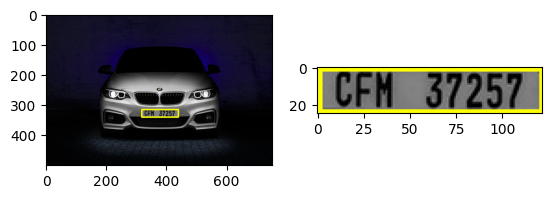

In [1]:
import cv2
import matplotlib.pyplot as plt
image=cv2.imread('/kaggle/input/car-image/car.jpg')

gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.bilateralFilter(gray,11,7,7)
edge=cv2.Canny(gray,30,200)
contours,_= cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours=sorted(contours,key=cv2.contourArea, reverse=True)[:10]

location=None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:

        location=approx
        break

x,y,w,h=cv2.boundingRect(location)
cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,4),3)
dashboard=image[y:y+h,x:x+w]
fig, (ax1, ax2) = plt.subplots(1, 2)

# Show the images in the subplots
ax1.imshow(image)
ax2.imshow(dashboard)

# Show the plot
plt.show()
